# Lab A
By Anthony Sanford & Nicolas Harvie
***

## Outline

1. Review of OLS 
2. Exemples
3. Problems 
4. Actual Tools 
5. Future Tools 

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [6]:
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

## Review of OLS 

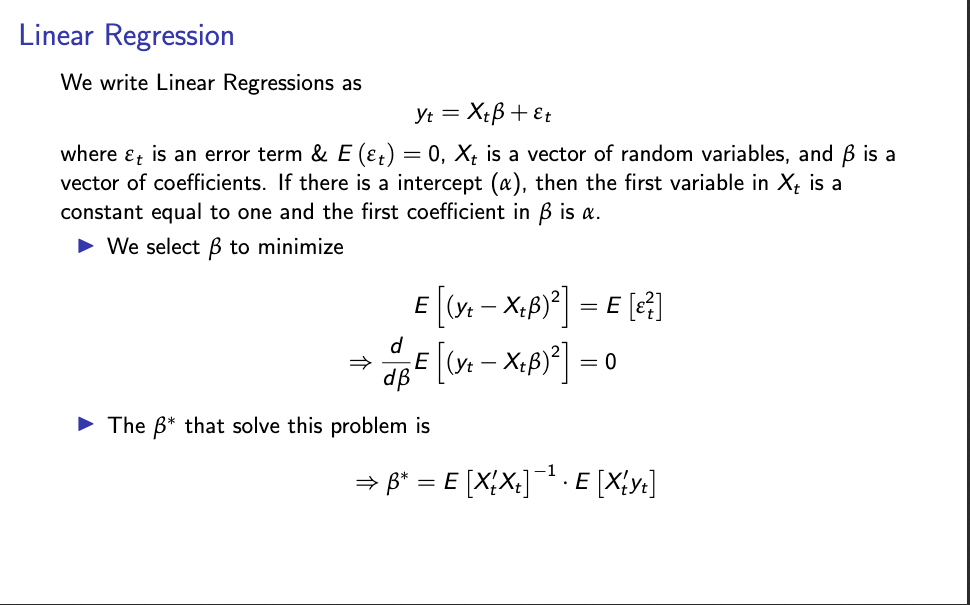

In [7]:
Image('../slide_images/LinReg1.png')

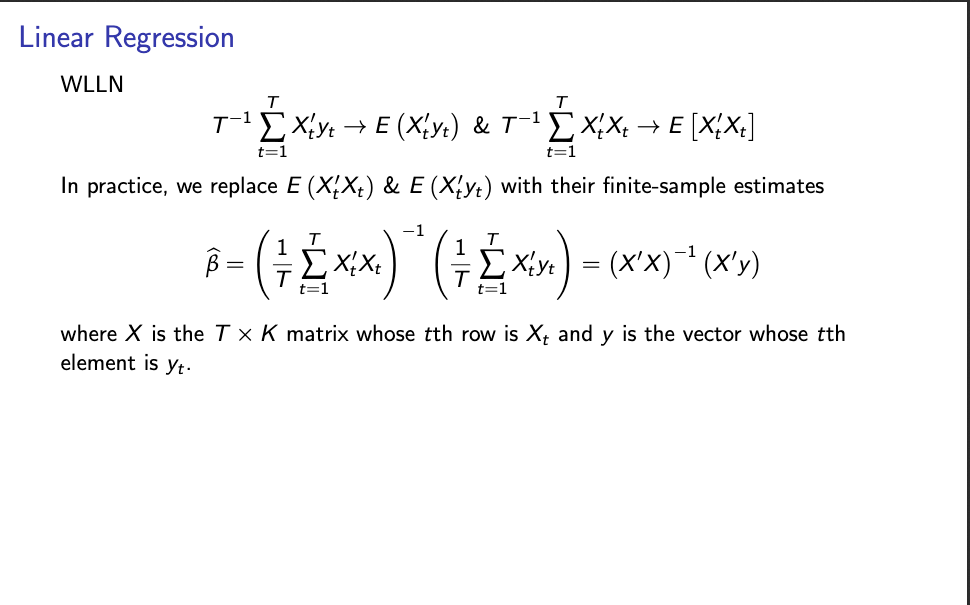

In [8]:
Image('../slide_images/LinReg2.png')

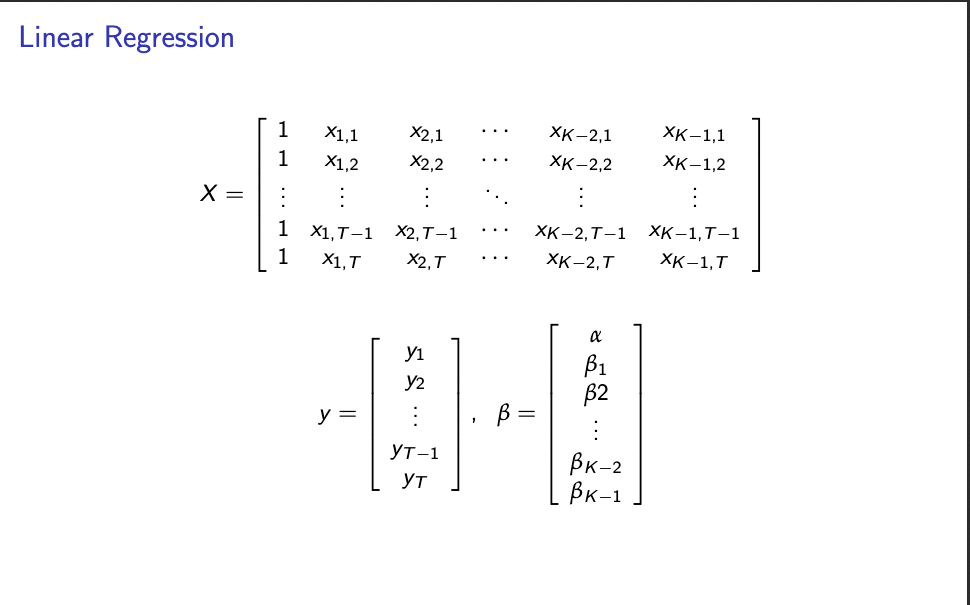

In [9]:
Image('../slide_images/LinReg3.png')

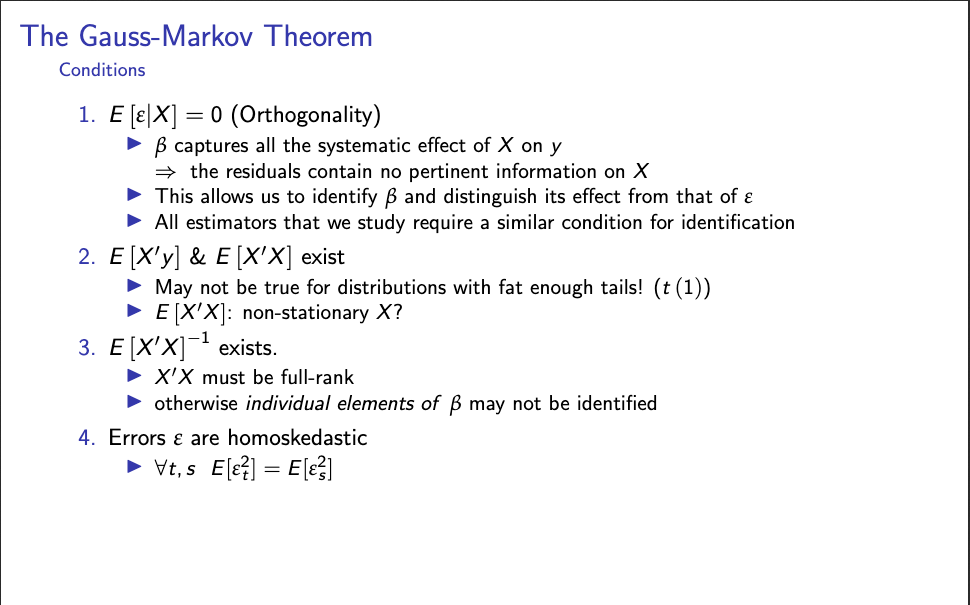

In [10]:
Image('../slide_images/GM.png')

## Exemples

In [11]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [12]:
returns_df = pd.read_csv('../data/returns.csv')

In [13]:
returns_df

,PERMNO,date,RET
0,10107,20131203,-0.003641
1,10107,20131204,0.016445
2,10107,20131205,-0.024140
3,10107,20131206,0.009474
4,10107,20131209,0.008994
...,...,...,...
4529,14593,20221128,-0.026264
4530,14593,20221129,-0.021148
4531,14593,20221130,0.048594
4532,14593,20221201,0.001892


In [14]:
x = np.array(returns_df[returns_df['PERMNO'] == 10107]['RET'])
y = np.array(returns_df[returns_df['PERMNO'] == 14593]['RET'])

In [15]:
x

array([-0.003641,  0.016445, -0.02414 , ...,  0.061624, -0.001764,
        0.001296])

In [16]:
y

array([ 0.027379, -0.002334,  0.005135, ...,  0.048594,  0.001892,
       -0.003371])

In [17]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]


In [18]:
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[7.23354962e-01]
 [3.50593030e-04]]


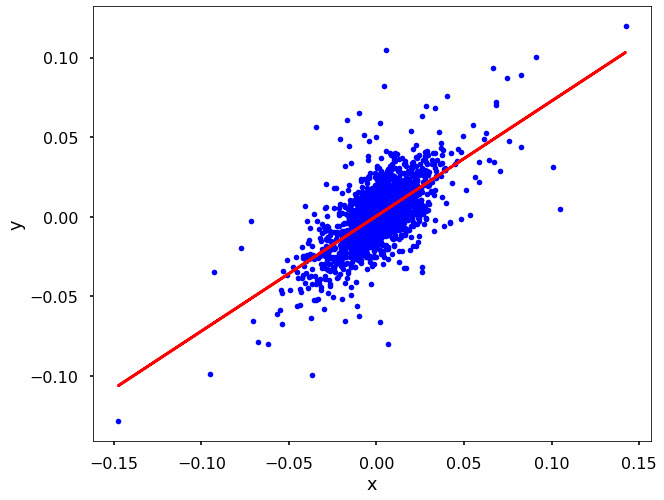

In [19]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
# You can also do this 
ols = sm.OLS(endog=y, exog=x).fit(use_t=True)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.461
Model:                            OLS   Adj. R-squared (uncentered):              0.460
Method:                 Least Squares   F-statistic:                              1936.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                   3.53e-306
Time:                        10:59:59   Log-Likelihood:                          6549.7
No. Observations:                2267   AIC:                                 -1.310e+04
Df Residuals:                    2266   BIC:                                 -1.309e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7246      0.016     43.998      0.000       0.692       0.757
==============================================================================
Omnibus:                      321.740   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3382.114
Skew:                           0.287   Prob(JB):                         0.00
Kurtosis:                       8.956   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Problems 

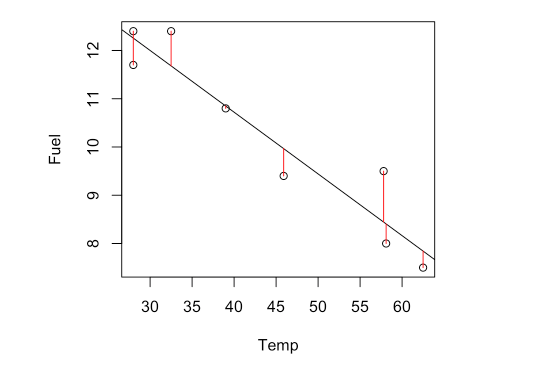

In [21]:
Image('../slide_images/GoodReg.png')

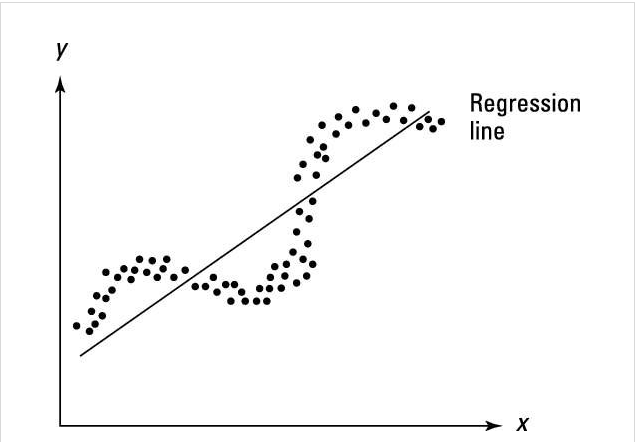

In [22]:
# Autocorrelation in the residuals 
Image('../slide_images/Autocorr.png')

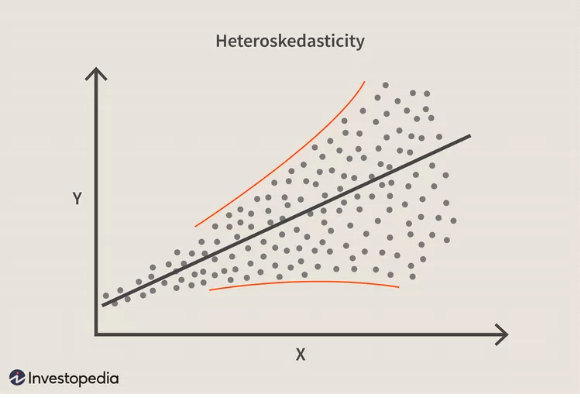

In [23]:
# Heteroskedasticity in the Residuals 
Image('../slide_images/Hetero.png')

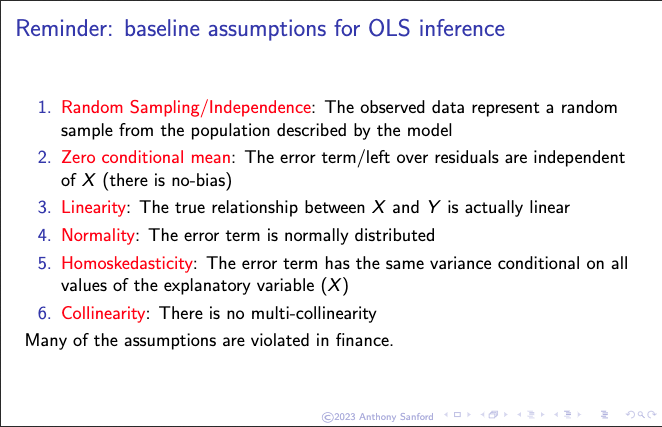

In [24]:
# Other Problems
Image('../slide_images/OLS_Assumptions.png')

## Actual Solutions

Actual solutions involve changing the nature of the errors in the context of OLS